# 20MAI0005_Abhishek_Kumar
# Digital Assignment

https://github.com/abhi4143/machine-learning

It consists of data related to a cricket match , whether in the given condition cricket match can happen or not. It consists of 15 rows and 5 columns. Five columns consists of Outlook , Rainfall, Humidy, Day/Night, Play cricket .

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#loading the crx.data dataset
data=pd.read_csv('data_set_dl_1.csv')

In [4]:
# Check the number of rows and columns in the dataframe

data.shape

(15, 5)

In [5]:
# Get a summary of the dataframe using 'describe()'

data.describe()

,Outlook,Rainfall,humidy,Day/Night,play cricket
count,15,15,15,15,15
unique,2,2,2,2,2
top,Overcast,yes,Yes,Day,yes
freq,11,9,14,12,10


In [6]:
# Get the column-wise Null count using 'is.null()' alongwith the 'sum()' function

data.isnull().sum()

Outlook         0
Rainfall        0
humidy          0
Day/Night       0
play cricket    0
dtype: int64

In [7]:
data.head(5)

,Outlook,Rainfall,humidy,Day/Night,play cricket
0,Overcast,yes,Yes,Day,yes
1,Overcast,yes,Yes,Day,yes
2,Overcast,no,Yes,Night,no
3,Sunny,yes,Yes,Day,yes
4,Overcast,yes,Yes,Day,yes


In [8]:
# printing unique values of mutiple attributes
print(data['Rainfall'].unique())
print('\n')
print(data['humidy'].unique())

['yes' 'no']


['Yes' 'No']


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Outlook       15 non-null     object
 1   Rainfall      15 non-null     object
 2   humidy        15 non-null     object
 3   Day/Night     15 non-null     object
 4   play cricket  15 non-null     object
dtypes: object(5)
memory usage: 728.0+ bytes


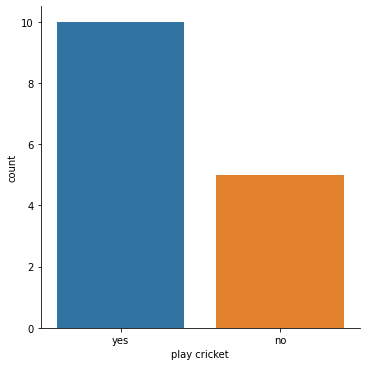

In [10]:
import seaborn as sns
sns.catplot(x='play cricket',kind='count',data=data)

In [11]:
#Replacing Yes with 1 and No with 0 and Mammals with 0 and Repitiles with 1
data['Day/Night'] = data['Day/Night'].replace('Day', 1)
data['Day/Night'] = data['Day/Night'].replace('Night', 0)

data['Outlook'] = data['Outlook'].replace('Overcast', 1)
data['Outlook'] = data['Outlook'].replace('Sunny', 0)

data['Rainfall'] = data['Rainfall'].replace('yes', 1)
data['Rainfall'] = data['Rainfall'].replace('no', 0)

data['humidy'] = data['humidy'].replace('Yes', 1)
data['humidy'] = data['humidy'].replace('No', 0)

data['play cricket'] = data['play cricket'].replace('yes', 0)
data['play cricket'] = data['play cricket'].replace('no', 1)

In [12]:
data.head()

,Outlook,Rainfall,humidy,Day/Night,play cricket
0,1,1,1,1,0
1,1,1,1,1,0
2,1,0,1,0,1
3,0,1,1,1,0
4,1,1,1,1,0


In [13]:
data['Outlook']=data['Outlook'].astype('double')
data['Rainfall']=data['Rainfall'].astype('double')
data['humidy']=data['humidy'].astype('double')
data['Day/Night']=data['Day/Night'].astype('double')
data['play cricket']=data['play cricket'].astype('double')

In [14]:
# Set the Predictor(X) and Response(Y) variables
X = data.drop("play cricket", axis = 1)
Y = data["play cricket"]

In [15]:
# Spliting into Training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 25)

In [16]:
# fitting into Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier
clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 
y_pred_dt=clf_entropy.fit(X_train, Y_train).predict(X_test)
print(y_pred_dt)

[0. 0. 0. 0. 0.]


In [17]:
#Confusion Matrix and Accuracy score
from sklearn.metrics import confusion_matrix,accuracy_score,average_precision_score
cnf_matrix_dt = confusion_matrix(Y_test, y_pred_dt)
print("Confusion Matrix")
print(cnf_matrix_dt)
average_precision = average_precision_score(Y_test, y_pred_dt)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

print("Accuracy Score")
accuracy_score(Y_test,y_pred_dt)*100

Confusion Matrix
[[5]]
Average precision-recall score: nan
Accuracy Score


100.0

In [18]:
#fitting into Navies Bayes classification
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score
gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train, Y_train).predict(X_test)
print(y_pred_gnb)

[0. 0. 0. 0. 0.]


In [19]:
#Confusion Matrix and Accuracy score
cmgnb=confusion_matrix(Y_test,y_pred_gnb)
print(cmgnb)
average_precision = average_precision_score(Y_test, y_pred_gnb)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
print('Accuracy score')
accuracy_score(Y_test,y_pred_gnb)*100

[[5]]
Average precision-recall score: nan
Accuracy score


100.0